<h3> Models A, B, C </h3>

In [1]:
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

def total_params(model):
    return sum(param.numel() for param in model.parameters() if param.requires_grad)
class CustomModelA(nn.Module):

    def __init__(self):
        super(CustomModelA, self).__init__()
        self.layer1 = nn.Linear(1, 5)
        self.layer2 = nn.Linear(5, 10)
        self.layer3 = nn.Linear(10, 10)
        self.layer4 = nn.Linear(10, 10)
        self.layer5 = nn.Linear(10, 10)
        self.layer6 = nn.Linear(10, 10)
        self.layer7 = nn.Linear(10, 5)
        self.final_layer = nn.Linear(5, 1)

    def forward(self, input_data):
        input_data = F.leaky_relu(self.layer1(input_data))
        input_data = F.leaky_relu(self.layer2(input_data))
        input_data = F.leaky_relu(self.layer3(input_data))
        input_data = F.leaky_relu(self.layer4(input_data))
        input_data = F.leaky_relu(self.layer5(input_data))
        input_data = F.leaky_relu(self.layer6(input_data))
        input_data = F.leaky_relu(self.layer7(input_data))
        return self.final_layer(input_data)


model_a = CustomModelA()
print('Total parameters in ModelA:', total_params(model_a))

class CustomModelB(nn.Module):
    def __init__(self):
        super(CustomModelB, self).__init__()
        self.layer1 = nn.Linear(1, 10)
        self.layer2 = nn.Linear(10, 18)
        self.layer3 = nn.Linear(18, 15)
        self.layer4 = nn.Linear(15, 4)
        self.output_layer = nn.Linear(4, 1)

    def forward(self, input_data):
        input_data = F.leaky_relu(self.layer1(input_data))
        input_data = F.leaky_relu(self.layer2(input_data))
        input_data = F.leaky_relu(self.layer3(input_data))
        input_data = F.leaky_relu(self.layer4(input_data))
        return self.output_layer(input_data)

model_b = CustomModelB()
print('Total parameters in ModelB:', total_params(model_b))

class CustomModelC(nn.Module):
    def __init__(self):
        super(CustomModelC, self).__init__()
        self.first_layer = nn.Linear(1, 190)
        self.output_layer = nn.Linear(190, 1)

    def forward(self, input_tensor):
        input_tensor = nn.functional.leaky_relu(self.first_layer(input_tensor))
        return self.output_layer(input_tensor)


model_c = CustomModelC()
print('Total parameters in ModslC:', total_params(model_c))


Total parameters in ModelA: 571
Total parameters in ModelB: 572
Total parameters in ModslC: 571


<h3>Function 1, 2</h3>

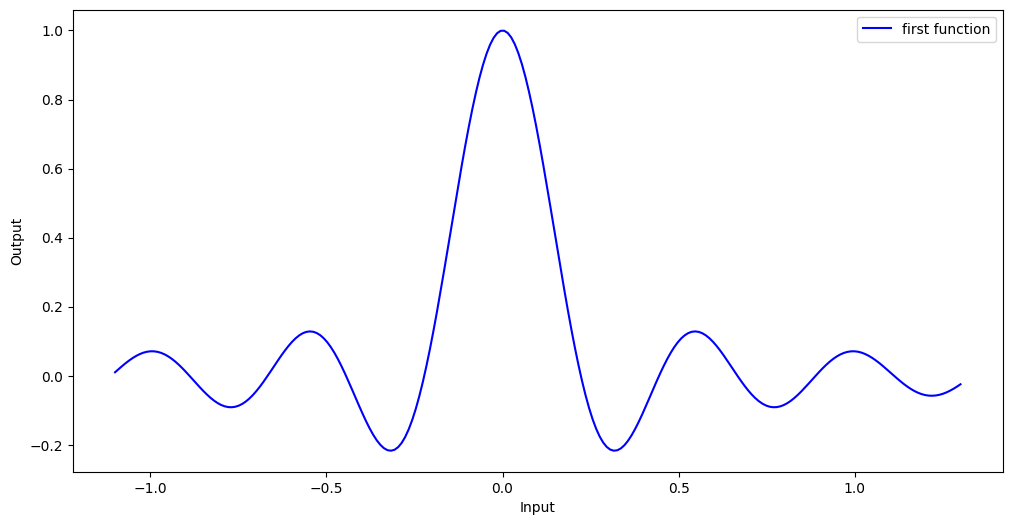

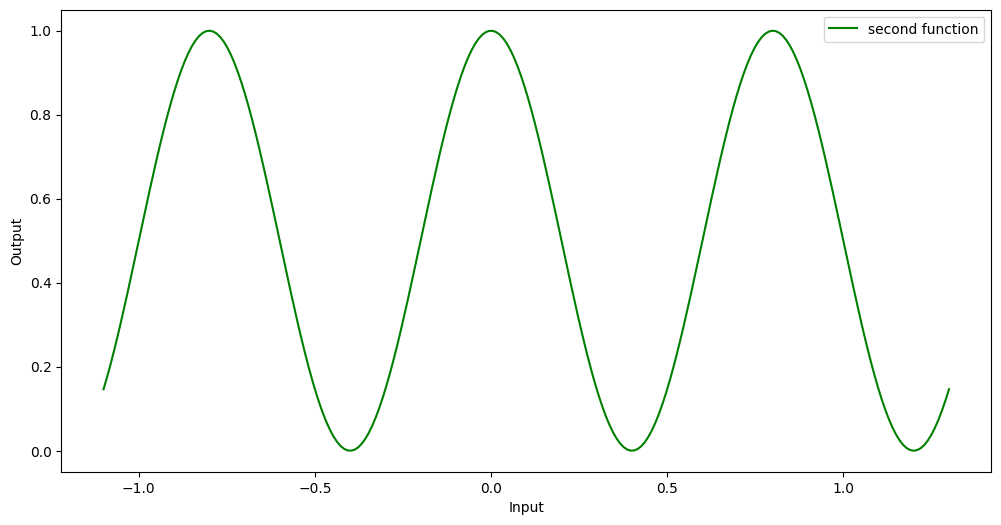

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt

input_range = np.expand_dims(np.linspace(-1.1, 1.3, 240), 1)
output_vals = np.sinc(4.5 * input_range)

input_tensor = torch.tensor(input_range, dtype=torch.float32)
output_tensor = torch.tensor(output_vals, dtype=torch.float32)

plt.figure(figsize=(12, 6))
plt.xlabel('Input')
plt.ylabel('Output')
plt.plot(input_tensor, output_tensor, color="blue", label="first function")
plt.legend()
plt.show()

output_vals_2 = (np.cos(2.5 * np.pi * input_range) / 2 + 0.5)
output_tensor_2 = torch.tensor(output_vals_2, dtype=torch.float32)

plt.figure(figsize=(12, 6))
plt.xlabel('Input')
plt.ylabel('Output')
plt.plot(input_tensor, output_tensor_2, color='green', label="second function")
plt.legend()
plt.show()

loss_function = torch.nn.MSELoss()

In [3]:
def optimize_model(model, inputs, targets):
    convergence_met = False
    epochs_tracked = []
    losses_tracked = []

    for epoch in range(30000):
        if convergence_met:
            return epochs_tracked, losses_tracked, predictions

        predictions = model(inputs)
        loss = loss_function(predictions, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epochs_tracked.append(epoch)
        losses_tracked.append(loss.item())

        if epoch % 300 == 0:
            print(f'Epoch: {epoch}, Loss: {loss.item():.4f}')

        if epoch > 5 and losses_tracked[-1] < 0.001:
            recent_losses = losses_tracked[-3:]
            if max(recent_losses) - min(recent_losses) < 1e-5:
                print(f"Model has converged with a loss of {losses_tracked[-1]:.4f}")
                convergence_met = True

    return epochs_tracked, losses_tracked, predictions


<h3>Model A, Function 1 </h3>

In [11]:
# Train model for function 1 output
model_1 = CustomModelA()
optimizer = torch.optim.RMSprop(model_1.parameters(), lr = 0.001)
max_epoch_arr_1, max_loss_arr_1, maxy_prediction_1 = optimize_model(model_1, input_tensor, output_tensor)


Epoch: 0, Loss: 0.2557
Epoch: 300, Loss: 0.0300
Epoch: 600, Loss: 0.0054
Epoch: 900, Loss: 0.0045
Epoch: 1200, Loss: 0.0040
Epoch: 1500, Loss: 0.0035
Epoch: 1800, Loss: 0.0032
Epoch: 2100, Loss: 0.0031
Epoch: 2400, Loss: 0.0030
Epoch: 2700, Loss: 0.0030
Epoch: 3000, Loss: 0.0029
Epoch: 3300, Loss: 0.0029
Epoch: 3600, Loss: 0.0028
Epoch: 3900, Loss: 0.0028
Epoch: 4200, Loss: 0.0027
Epoch: 4500, Loss: 0.0024
Epoch: 4800, Loss: 0.0024
Epoch: 5100, Loss: 0.0024
Epoch: 5400, Loss: 0.0042
Epoch: 5700, Loss: 0.0024
Epoch: 6000, Loss: 0.0025
Epoch: 6300, Loss: 0.0024
Epoch: 6600, Loss: 0.0024
Epoch: 6900, Loss: 0.0028
Epoch: 7200, Loss: 0.0027
Epoch: 7500, Loss: 0.0026
Epoch: 7800, Loss: 0.0025
Epoch: 8100, Loss: 0.0026
Epoch: 8400, Loss: 0.0025
Epoch: 8700, Loss: 0.0026
Epoch: 9000, Loss: 0.0024
Epoch: 9300, Loss: 0.0022
Epoch: 9600, Loss: 0.0023
Epoch: 9900, Loss: 0.0022
Epoch: 10200, Loss: 0.0022
Epoch: 10500, Loss: 0.0020
Epoch: 10800, Loss: 0.0019
Epoch: 11100, Loss: 0.0020
Epoch: 11400, 

<h3>Model B, Function 1 </h3>

In [12]:
model_2 = CustomModelB()
optimizer = torch.optim.RMSprop(model_2.parameters(), lr = 0.001)
max_epoch_arr_2, max_loss_arr_2, maxy_prediction_2 = optimize_model(model_2, input_tensor, output_tensor)


Epoch: 0, Loss: 0.1762
Epoch: 300, Loss: 0.0123
Epoch: 600, Loss: 0.0053
Epoch: 900, Loss: 0.0041
Epoch: 1200, Loss: 0.0033
Epoch: 1500, Loss: 0.0027
Epoch: 1800, Loss: 0.0023
Epoch: 2100, Loss: 0.0023
Epoch: 2400, Loss: 0.0020
Epoch: 2700, Loss: 0.0020
Epoch: 3000, Loss: 0.0017
Epoch: 3300, Loss: 0.0018
Epoch: 3600, Loss: 0.0017
Epoch: 3900, Loss: 0.0016
Epoch: 4200, Loss: 0.0016
Epoch: 4500, Loss: 0.0016
Epoch: 4800, Loss: 0.0016
Epoch: 5100, Loss: 0.0016
Epoch: 5400, Loss: 0.0015
Epoch: 5700, Loss: 0.0016
Epoch: 6000, Loss: 0.0015
Epoch: 6300, Loss: 0.0014
Epoch: 6600, Loss: 0.0016
Epoch: 6900, Loss: 0.0014
Epoch: 7200, Loss: 0.0014
Epoch: 7500, Loss: 0.0014
Epoch: 7800, Loss: 0.0013
Epoch: 8100, Loss: 0.0014
Epoch: 8400, Loss: 0.0015
Epoch: 8700, Loss: 0.0015
Epoch: 9000, Loss: 0.0015
Epoch: 9300, Loss: 0.0015
Epoch: 9600, Loss: 0.0013
Epoch: 9900, Loss: 0.0013
Epoch: 10200, Loss: 0.0015
Epoch: 10500, Loss: 0.0015
Epoch: 10800, Loss: 0.0013
Epoch: 11100, Loss: 0.0013
Epoch: 11400, 

<h3>Model C, Function 1 </h3>

In [13]:
model_3 = CustomModelC()
optimizer = torch.optim.RMSprop(model_3.parameters(), lr = 0.001)
max_epoch_arr_3, max_loss_arr_3, maxy_prediction_3 = optimize_model(model_3, input_tensor, output_tensor)


Epoch: 0, Loss: 0.1615
Epoch: 300, Loss: 0.0357
Epoch: 600, Loss: 0.0231
Epoch: 900, Loss: 0.0166
Epoch: 1200, Loss: 0.0129
Epoch: 1500, Loss: 0.0106
Epoch: 1800, Loss: 0.0090
Epoch: 2100, Loss: 0.0079
Epoch: 2400, Loss: 0.0071
Epoch: 2700, Loss: 0.0065
Epoch: 3000, Loss: 0.0060
Epoch: 3300, Loss: 0.0056
Epoch: 3600, Loss: 0.0053
Epoch: 3900, Loss: 0.0050
Epoch: 4200, Loss: 0.0048
Epoch: 4500, Loss: 0.0045
Epoch: 4800, Loss: 0.0043
Epoch: 5100, Loss: 0.0042
Epoch: 5400, Loss: 0.0040
Epoch: 5700, Loss: 0.0038
Epoch: 6000, Loss: 0.0037
Epoch: 6300, Loss: 0.0036
Epoch: 6600, Loss: 0.0035
Epoch: 6900, Loss: 0.0034
Epoch: 7200, Loss: 0.0033
Epoch: 7500, Loss: 0.0032
Epoch: 7800, Loss: 0.0031
Epoch: 8100, Loss: 0.0030
Epoch: 8400, Loss: 0.0029
Epoch: 8700, Loss: 0.0028
Epoch: 9000, Loss: 0.0027
Epoch: 9300, Loss: 0.0027
Epoch: 9600, Loss: 0.0026
Epoch: 9900, Loss: 0.0026
Epoch: 10200, Loss: 0.0025
Epoch: 10500, Loss: 0.0024
Epoch: 10800, Loss: 0.0024
Epoch: 11100, Loss: 0.0023
Epoch: 11400, 

<h3>Model A, Function 2 </h3>

In [30]:
# Train model for function 2 output
model_1 = CustomModelA()
optimizer = torch.optim.RMSprop(model_1.parameters(), lr = 0.001)
max_epoch_arr_1_2, max_loss_arr_1_2, maxy_prediction_1_2 = optimize_model(model_1, input_tensor, output_tensor_2)


Epoch: 0, Loss: 0.3772
Epoch: 300, Loss: 0.1099
Epoch: 600, Loss: 0.0696
Epoch: 900, Loss: 0.0250
Epoch: 1200, Loss: 0.0110
Epoch: 1500, Loss: 0.0080
Epoch: 1800, Loss: 0.0064
Epoch: 2100, Loss: 0.0083
Epoch: 2400, Loss: 0.0044
Epoch: 2700, Loss: 0.0053
Epoch: 3000, Loss: 0.0040
Epoch: 3300, Loss: 0.0038
Epoch: 3600, Loss: 0.0043
Epoch: 3900, Loss: 0.0039
Epoch: 4200, Loss: 0.0035
Epoch: 4500, Loss: 0.0035
Epoch: 4800, Loss: 0.0032
Epoch: 5100, Loss: 0.0025
Epoch: 5400, Loss: 0.0032
Epoch: 5700, Loss: 0.0036
Epoch: 6000, Loss: 0.0025
Epoch: 6300, Loss: 0.0024
Epoch: 6600, Loss: 0.0035
Epoch: 6900, Loss: 0.0033
Epoch: 7200, Loss: 0.0016
Epoch: 7500, Loss: 0.0015
Epoch: 7800, Loss: 0.0020
Epoch: 8100, Loss: 0.0023
Epoch: 8400, Loss: 0.0019
Model has converged with a loss of 0.0010


<h3>Model B, Function 2 </h3>

In [31]:
model_2 = CustomModelB()
optimizer = torch.optim.RMSprop(model_2.parameters(), lr = 0.001)
max_epoch_arr_2_2, max_loss_arr_2_2, maxy_prediction_2_2 = optimize_model(model_2, input_tensor, output_tensor_2)


Epoch: 0, Loss: 0.1909
Epoch: 300, Loss: 0.0304
Epoch: 600, Loss: 0.0029
Epoch: 900, Loss: 0.0021
Epoch: 1200, Loss: 0.0014
Epoch: 1500, Loss: 0.0018
Epoch: 1800, Loss: 0.0015
Epoch: 2100, Loss: 0.0018
Epoch: 2400, Loss: 0.0018
Epoch: 2700, Loss: 0.0013
Epoch: 3000, Loss: 0.0010
Epoch: 3300, Loss: 0.0010
Epoch: 3600, Loss: 0.0010
Epoch: 3900, Loss: 0.0011
Epoch: 4200, Loss: 0.0012
Epoch: 4500, Loss: 0.0013
Epoch: 4800, Loss: 0.0010
Epoch: 5100, Loss: 0.0007
Epoch: 5400, Loss: 0.0007
Epoch: 5700, Loss: 0.0007
Epoch: 6000, Loss: 0.0006
Epoch: 6300, Loss: 0.0007
Epoch: 6600, Loss: 0.0006
Epoch: 6900, Loss: 0.0004
Epoch: 7200, Loss: 0.0005
Epoch: 7500, Loss: 0.0006
Model has converged with a loss of 0.0002


<h3>Model C, Function 2 </h3>

In [21]:
model_3 = CustomModelC()
optimizer = torch.optim.RMSprop(model_3.parameters(), lr = 0.001)
max_epoch_arr_3_2, max_loss_arr_3_2, maxy_prediction_3_2  = optimize_model(model_3, input_tensor, output_tensor_2)


Epoch: 0, Loss: 0.6288
Epoch: 300, Loss: 0.0547
Epoch: 600, Loss: 0.0276
Epoch: 900, Loss: 0.0154
Epoch: 1200, Loss: 0.0095
Epoch: 1500, Loss: 0.0064
Epoch: 1800, Loss: 0.0048
Epoch: 2100, Loss: 0.0039
Epoch: 2400, Loss: 0.0034
Epoch: 2700, Loss: 0.0032
Epoch: 3000, Loss: 0.0029
Epoch: 3300, Loss: 0.0028
Epoch: 3600, Loss: 0.0026
Epoch: 3900, Loss: 0.0025
Epoch: 4200, Loss: 0.0024
Epoch: 4500, Loss: 0.0023
Epoch: 4800, Loss: 0.0022
Epoch: 5100, Loss: 0.0021
Epoch: 5400, Loss: 0.0021
Epoch: 5700, Loss: 0.0020
Epoch: 6000, Loss: 0.0020
Epoch: 6300, Loss: 0.0019
Epoch: 6600, Loss: 0.0019
Epoch: 6900, Loss: 0.0019
Epoch: 7200, Loss: 0.0018
Epoch: 7500, Loss: 0.0018
Epoch: 7800, Loss: 0.0018
Epoch: 8100, Loss: 0.0018
Epoch: 8400, Loss: 0.0017
Epoch: 8700, Loss: 0.0017
Epoch: 9000, Loss: 0.0017
Epoch: 9300, Loss: 0.0017
Epoch: 9600, Loss: 0.0017
Epoch: 9900, Loss: 0.0016
Epoch: 10200, Loss: 0.0016
Epoch: 10500, Loss: 0.0016
Epoch: 10800, Loss: 0.0016
Epoch: 11100, Loss: 0.0016
Epoch: 11400, 

<h3> Compare the prediction of different models for function 1 </h3>

<ipython-input-20-895a84320290>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-" (-> color='g'). The keyword argument will take precedence.
  ax.plot(input_tensor, maxy_prediction_3.data, 'g-', color='red', label='Model 3')  # Orange line with circle markers


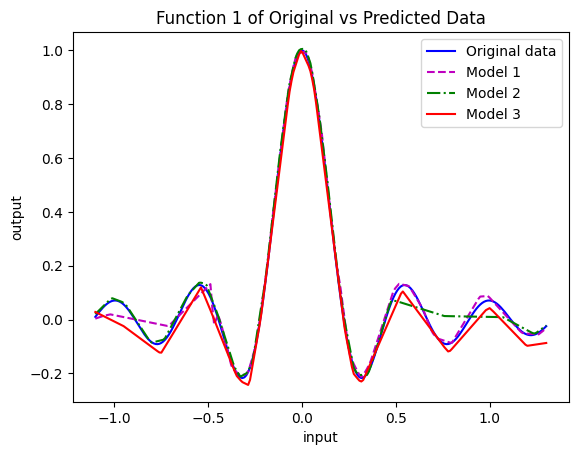

In [20]:
fig, ax = plt.subplots()

ax.plot(input_tensor, output_tensor, 'b-', label='Original data')  # Blue solid line
ax.plot(input_tensor, maxy_prediction_1.data, 'm--', label='Model 1')  # Purple dashed line
ax.plot(input_tensor, maxy_prediction_2.data, 'g-.', label='Model 2')  # Green dash-dot line
ax.plot(input_tensor, maxy_prediction_3.data, 'g-', color='red', label='Model 3')  # Orange line with circle markers

ax.set_title("Function 1 of Original vs Predicted Data")
ax.set_xlabel("input")
ax.set_ylabel("output")

ax.legend()

plt.show()

<h3> Compare the prediction of different models for function 2 </h3>

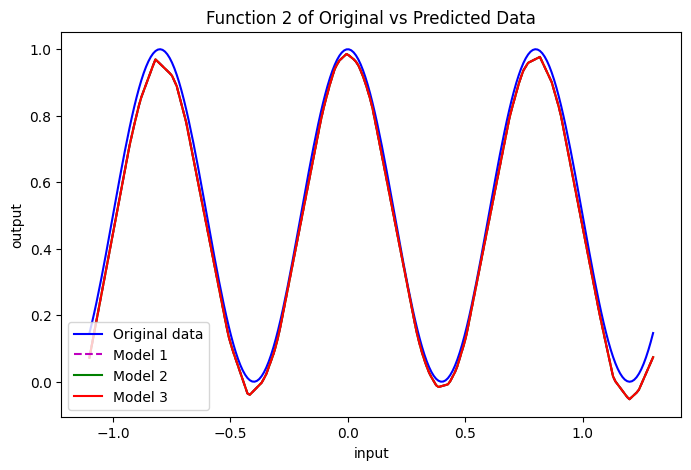

In [25]:

fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title("Function 2 of Original vs Predicted Data")

ax.plot(input_tensor, output_tensor_2, 'b-', label='Original data')  # red line
ax.plot(input_tensor, maxy_prediction_3_2.data, 'm--', label='Model 1')  # purple line
ax.plot(input_tensor, maxy_prediction_3_2.data, 'g-', label='Model 2')  # green line
ax.plot(input_tensor, maxy_prediction_3_2.data, 'r-', label='Model 3')  # orange line

ax.set_xlabel("input")
ax.set_ylabel("output")
ax.legend()

plt.show()


<h3> different models predict function 1</h3>

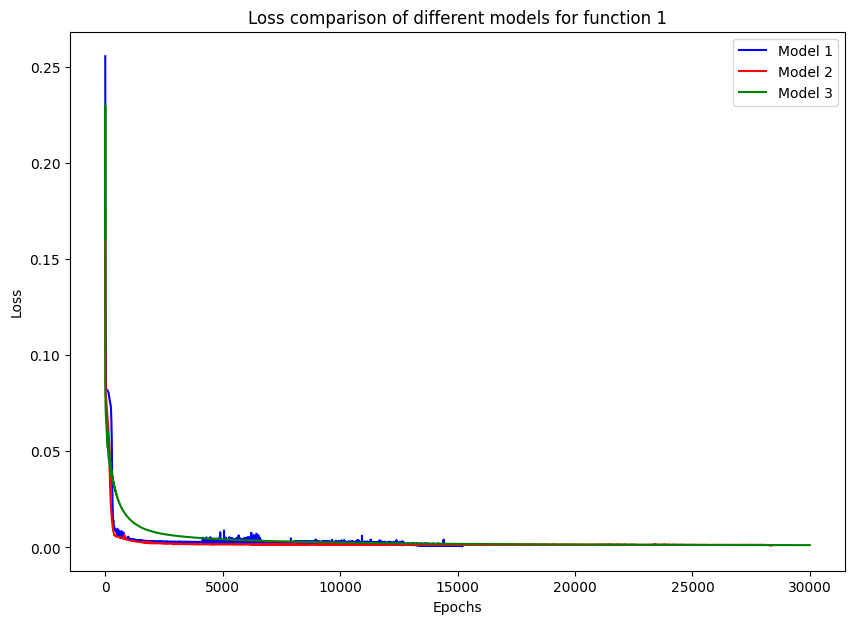

In [27]:
plt.figure(figsize=(10,7))
plt.title("Loss comparison of different models for function 1")
plt.plot(max_epoch_arr_1, max_loss_arr_1, '-b')
plt.plot(max_epoch_arr_2, max_loss_arr_2, '-r')
plt.plot(max_epoch_arr_3, max_loss_arr_3, '-g')
plt.legend([ 'Model 1', 'Model 2','Model 3'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

<h3>different models predict function 2.</h3>





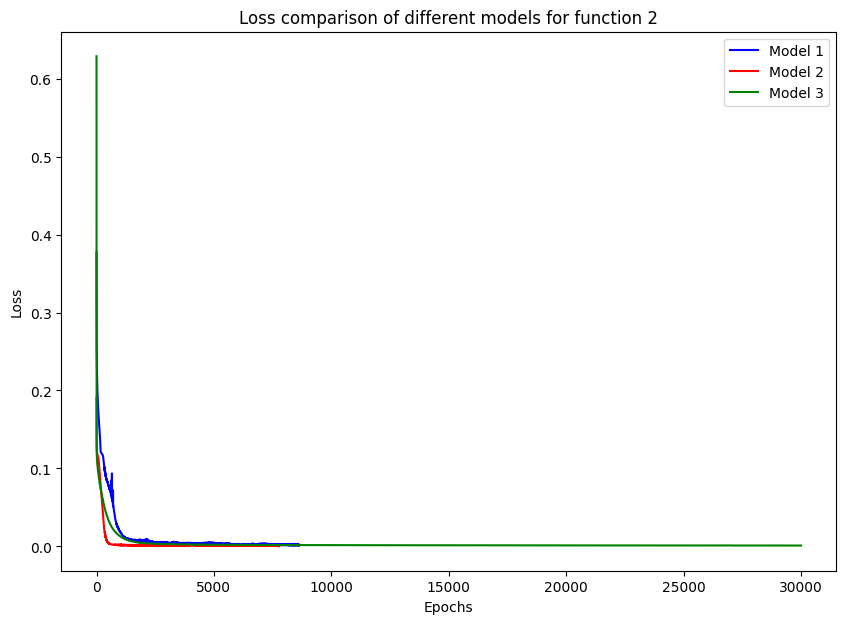

In [33]:
plt.figure(figsize=(10,7))
plt.title("Loss comparison of different models for function 2")
plt.plot(max_epoch_arr_1_2, max_loss_arr_1_2, '-b')
plt.plot(max_epoch_arr_2_2, max_loss_arr_2_2, '-r')
plt.plot(max_epoch_arr_3_2, max_loss_arr_3_2, '-g')
plt.legend([ 'Model 1', 'Model 2','Model 3'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

